In [1]:
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as osp
import matplotlib

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

plt.style.use(["science", "ieee"])
api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../output/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")

In [2]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [37]:
def process_results(run_list, rolling_size: int = 1):
    dfs = []
    for run_name in run_list:
        print(run_name)
        run = api.run(run_name)
        df = run.history(keys=["training_set_size", "test_acc", "test_loss"])
        df.dropna().sort_values(by="training_set_size").set_index("training_set_size")
        dfs.append(df)

    df = pd.concat(dfs)

    test_acc_mean = (
        df.groupby("training_set_size")["test_acc"]
        .mean()
        .sort_index()
        .rolling(rolling_size)
        .mean()
    )
    test_acc_std = (
        df.groupby("training_set_size")["test_acc"]
        .std()
        .sort_index()
        .rolling(rolling_size)
        .mean()
    )

    low = test_acc_mean + 1.960 * test_acc_std / np.sqrt(len(dfs))
    high = test_acc_mean - 1.960 * test_acc_std / np.sqrt(len(dfs))

    mnist_random_results = {"mean": test_acc_mean, "low": low, "high": high}
    return mnist_random_results

In [70]:
rolling_size=5
mnist_random_runs = [
    "kobybibas/pnml_for_active_learning/1vdv544b",
    "kobybibas/pnml_for_active_learning/3c3fwgof",
    "kobybibas/pnml_for_active_learning/eeuhr9pw",
    "kobybibas/pnml_for_active_learning/2wobudjw",
    "kobybibas/pnml_for_active_learning/21uym3xc",
    "kobybibas/pnml_for_active_learning/2r7en7dy",
]
mnist_bald_runs = [
    "kobybibas/pnml_for_active_learning/3sq1qs02",
    "kobybibas/pnml_for_active_learning/2eoz93al",
    "kobybibas/pnml_for_active_learning/16gfmda0",
    "kobybibas/pnml_for_active_learning/1f73098y",
    "kobybibas/pnml_for_active_learning/126n28n7",
    "kobybibas/pnml_for_active_learning/335m6o23",
]
mnist_pnml_dropout_runs = [
    "kobybibas/pnml_for_active_learning/210ol5f1",
    "kobybibas/pnml_for_active_learning/3fhs33jo", 
    "kobybibas/pnml_for_active_learning/1mie4ga7",
    "kobybibas/pnml_for_active_learning/1owvkzzi",
    "kobybibas/pnml_for_active_learning/23s6n673",
    "kobybibas/pnml_for_active_learning/2prgoalb",
]
mnist_random_res = process_results(run_list=mnist_random_runs, rolling_size=rolling_size)
mnist_bald_res = process_results(run_list=mnist_bald_runs, rolling_size=rolling_size)
mnist_pnml_dropout_res = process_results(run_list=mnist_pnml_dropout_runs, rolling_size=rolling_size)

kobybibas/pnml_for_active_learning/1vdv544b
kobybibas/pnml_for_active_learning/3c3fwgof
kobybibas/pnml_for_active_learning/eeuhr9pw
kobybibas/pnml_for_active_learning/2wobudjw
kobybibas/pnml_for_active_learning/21uym3xc
kobybibas/pnml_for_active_learning/2r7en7dy
kobybibas/pnml_for_active_learning/3sq1qs02
kobybibas/pnml_for_active_learning/2eoz93al
kobybibas/pnml_for_active_learning/16gfmda0
kobybibas/pnml_for_active_learning/1f73098y
kobybibas/pnml_for_active_learning/126n28n7
kobybibas/pnml_for_active_learning/335m6o23
kobybibas/pnml_for_active_learning/210ol5f1
kobybibas/pnml_for_active_learning/3fhs33jo
kobybibas/pnml_for_active_learning/1mie4ga7
kobybibas/pnml_for_active_learning/1owvkzzi
kobybibas/pnml_for_active_learning/23s6n673
kobybibas/pnml_for_active_learning/2prgoalb


MNIST


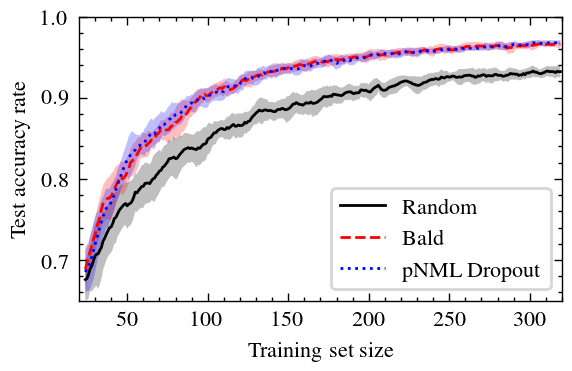

In [71]:
plt.style.use(["science", "ieee"])
fig, ax = plt.subplots(1, 1, dpi=200, figsize=(3, 2))

for i, (res, name) in enumerate( ([(mnist_random_res,'Random'), (mnist_bald_res,'Bald'),(mnist_pnml_dropout_res,'Dropout pNML')])):
    ax.plot(res["mean"], label=name,color=f'C{i}')
    ax.fill_between(
        res["low"].index,
        res["low"].values,
        res["high"].values,
        facecolor=f'C{i}',
        alpha=0.25)
ax.set_ylabel("Test accuracy rate")
ax.set_xlabel(f"Training set size")
ax.legend(frameon=True)
ax.set_ylim(0.65, 1)
ax.set_xlim(20, 320)
print('MNIST')
plt.tight_layout()
plt.savefig(osp.join(out_dir, "mnist.pdf"))
plt.show()

# EMNIST

In [61]:
rolling_size = 5
emnist_random_runs = [
"kobybibas/pnml_for_active_learning/4z383q8p",
"kobybibas/pnml_for_active_learning/2dhqdir6",
"kobybibas/pnml_for_active_learning/1r2fz18p",
"kobybibas/pnml_for_active_learning/262ndhnc",
"kobybibas/pnml_for_active_learning/2bjsehq9",
"kobybibas/pnml_for_active_learning/2bktcci5"
]
emnist_bald_runs = [
    "kobybibas/pnml_for_active_learning/1369urwi",
"kobybibas/pnml_for_active_learning/3tytr1xw",
"kobybibas/pnml_for_active_learning/1scx4wun",
"kobybibas/pnml_for_active_learning/bqd5j13y",
"kobybibas/pnml_for_active_learning/1jzrgt9x",
"kobybibas/pnml_for_active_learning/2tsqp46c"
]
emnist_pnml_dropout_runs = [
"kobybibas/pnml_for_active_learning/3gp14do6",
"kobybibas/pnml_for_active_learning/1wwv3a27",
"kobybibas/pnml_for_active_learning/1fjz314c",
"kobybibas/pnml_for_active_learning/yqlhz5w0",
"kobybibas/pnml_for_active_learning/22xy7gy9",
"kobybibas/pnml_for_active_learning/ppjjvw92",
]
emnist_random_res = process_results(run_list=emnist_random_runs, rolling_size=rolling_size)
emnist_bald_res = process_results(run_list=emnist_bald_runs, rolling_size=rolling_size)
emnist_pnml_dropout_res = process_results(run_list=emnist_pnml_dropout_runs, rolling_size=rolling_size)

kobybibas/pnml_for_active_learning/4z383q8p
kobybibas/pnml_for_active_learning/2dhqdir6
kobybibas/pnml_for_active_learning/1r2fz18p
kobybibas/pnml_for_active_learning/262ndhnc
kobybibas/pnml_for_active_learning/2bjsehq9
kobybibas/pnml_for_active_learning/2bktcci5
kobybibas/pnml_for_active_learning/1369urwi
kobybibas/pnml_for_active_learning/3tytr1xw
kobybibas/pnml_for_active_learning/1scx4wun
kobybibas/pnml_for_active_learning/bqd5j13y
kobybibas/pnml_for_active_learning/1jzrgt9x
kobybibas/pnml_for_active_learning/2tsqp46c
kobybibas/pnml_for_active_learning/3gp14do6
kobybibas/pnml_for_active_learning/1wwv3a27
kobybibas/pnml_for_active_learning/1fjz314c
kobybibas/pnml_for_active_learning/yqlhz5w0
kobybibas/pnml_for_active_learning/22xy7gy9
kobybibas/pnml_for_active_learning/ppjjvw92


EMNIST


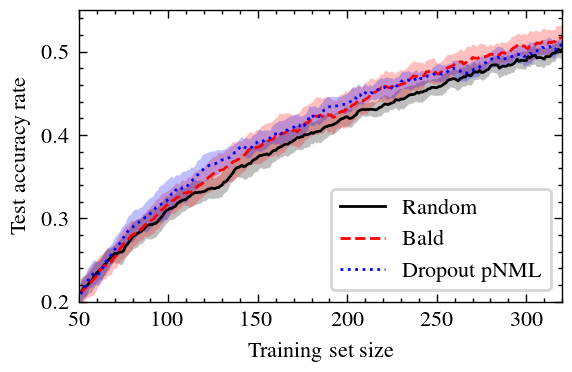

In [62]:
plt.style.use(["science", "ieee"])
fig, ax = plt.subplots(1, 1, dpi=200, figsize=(3, 2))

for i, (res, name) in enumerate( ([(emnist_random_res,'Random'), (emnist_bald_res,'Bald'),(emnist_pnml_dropout_res,'Dropout pNML')])):
    ax.plot(res["mean"], label=name,color=f'C{i}')
    ax.fill_between(
        res["low"].index,
        res["low"].values,
        res["high"].values,
        facecolor=f'C{i}',
        alpha=0.25)
ax.set_ylabel("Test accuracy rate")
ax.set_xlabel(f"Training set size")
ax.legend(frameon=True)
ax.set_ylim(0.2, 0.55)
ax.set_xlim(50,320)
print('EMNIST')
plt.tight_layout()
plt.savefig(osp.join(out_dir, "emnist.pdf"))
plt.show()

# CINIC10

In [63]:
rolling_size = 5
cinic_random_runs = [
    "kobybibas/pnml_for_active_learning/1kq2c3op",
    "kobybibas/pnml_for_active_learning/ndu0fb76"
]
cinic_bald_runs = [
    "kobybibas/pnml_for_active_learning/m2rafoyv",
    "kobybibas/pnml_for_active_learning/1xbstn7v"
]
cinic_pnml_dropout_runs = [
    "kobybibas/pnml_for_active_learning/2j0zs71p"
]
cinic_random_res = process_results(run_list=cinic_random_runs, rolling_size=rolling_size)
cinic_bald_res = process_results(run_list=cinic_bald_runs, rolling_size=rolling_size)
cinic_pnml_dropout_res = process_results(run_list=cinic_pnml_dropout_runs, rolling_size=rolling_size)

kobybibas/pnml_for_active_learning/1kq2c3op
kobybibas/pnml_for_active_learning/ndu0fb76
kobybibas/pnml_for_active_learning/m2rafoyv
kobybibas/pnml_for_active_learning/1xbstn7v
kobybibas/pnml_for_active_learning/2j0zs71p


CINIC


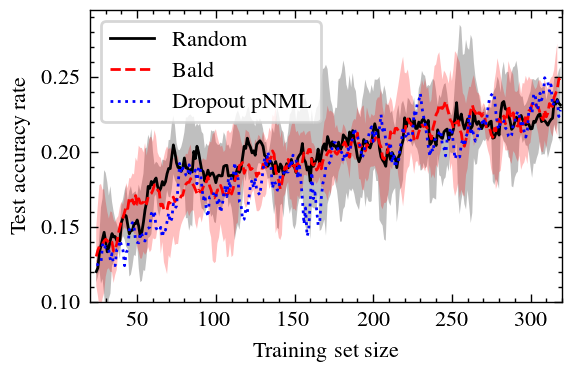

In [67]:
plt.style.use(["science", "ieee"])
fig, ax = plt.subplots(1, 1, dpi=200, figsize=(3, 2))

for i, (res, name) in enumerate( ([(cinic_random_res,'Random'), (cinic_bald_res,'Bald'),(cinic_pnml_dropout_res,'Dropout pNML')])):
    ax.plot(res["mean"], label=name,color=f'C{i}')
    ax.fill_between(
        res["low"].index,
        res["low"].values,
        res["high"].values,
        facecolor=f'C{i}',
        alpha=0.25)
ax.set_ylabel("Test accuracy rate")
ax.set_xlabel(f"Training set size")
ax.legend(frameon=True)
ax.set_ylim(0.1)
ax.set_xlim(20,320)
plt.tight_layout()
plt.savefig(osp.join(out_dir, "cinic.pdf"))
print('CINIC')
plt.show()